In [61]:
import urllib
from urllib2 import Request, urlopen, URLError
import json
import pandas as pd
import os
import requests
from lxml import html
import sys
import xlsxwriter
import csv
import xlrd
array = []
name_movie= []
rating_movie = []
genre_movie =  []
plot_movie = []
final = [[1,2,3,4,5,6,7,8,9],['MOVIES NAME','RATINGS','GENRE','PLOT', 'release_year','POSTER_URL','DIRECTOR', 'STARS','MOVIES_ID']]
movie_names = []
genre = []
plot = []
ratings = []
year = []
poster_url = []
director = []
stars = []
d = {
    'data' : {
    'genre' : 0,
    'plot' : 0,
    'rating' : 0,
    'stars' : 0
    }
}

def get_imdb_id(input):
    query = urllib.quote_plus(input)
    url = "http://www.imdb.com/find?ref_=nv_sr_fn&q="+query+"&s=all"
    page = requests.get(url)
    tree = html.fromstring(page.content)
    if"No results" in (tree.xpath('//h1[@class="findHeader"]/text()')[0]):
        imdb_id = "tt00000"
    else:
        imdb_id=(tree.xpath('//td[@class="result_text"]//a')[0].get('href'))
        imdb_id = imdb_id.replace('/title/','')
        imdb_id = imdb_id.replace('/?ref_=fn_al_tt_1','')
    return (imdb_id)

def get_info(id):  
    omdb_request = Request("http://theapache64.xyz:8080/movie_db/search?keyword="+id)
    response = urlopen(omdb_request)
    data = response.read()
    d=json.loads(data)

    print "Data as json : ",d
    
    print "\n\n"
    

    if (d["error"] ==  True) :
        message = "No results found"
        genre.append(message)
        plot.append(message)
        ratings.append(message)
        year.append(message)
        poster_url.append(message)
        director.append(message)
        stars.append(message)
           
    else:
        if(len(d["data"]) == 9):
            genre.append(d["data"]["genre"])
            plot.append(d["data"]["plot"])
            ratings.append(d["data"]["rating"])
            year.append(d["data"]["year"])
            poster_url.append(d["data"]["poster_url"])
            director.append(d["data"]["director"])
            stars.append(d["data"]["stars"])           
        else:
            message = "No results found"
            genre.append(message)
            plot.append(message)
            ratings.append(message)
            year.append(message)
            poster_url.append(message)
            director.append(message)
            stars.append(message)
        pass
      
def main():
    filepath = "/Users/Vinit/Documents/PROJECTS_MY/IMDB_MYPROJECT/extras/testing"
    print("Processing...")
    for file in os.listdir(filepath):
        get_info(get_imdb_id(file))
        movie_names.append(file)
    array.append(movie_names)
    array.append(ratings)
    array.append(genre)
    array.append(plot)
    array.append(year)
    array.append(poster_url)
    array.append(director)
    array.append(stars)
    
    for i in range(len(array[0])):
        newarray = []    
        newarray.append(array[0][i])
        newarray.append(array[1][i])
        newarray.append(array[2][i])
        newarray.append(array[3][i])
        newarray.append(array[4][i])
        newarray.append(array[5][i])
        newarray.append(array[6][i])
        newarray.append(array[7][i])
        newarray.append(i)
        
        
        if(newarray[0] == ".DS_Store"):
            continue
        final.append(newarray)

    workbook = xlsxwriter.Workbook('dataset.xlsx')
    worksheet = workbook.add_worksheet()
    for i in range(0,len(final)):
        worksheet.write('A'+str(i), final[i][0])
        worksheet.write('B'+str(i), final[i][1])
        worksheet.write('C'+str(i), str(final[i][2]))
        worksheet.write('D'+str(i), str(final[i][3]))
        worksheet.write('E'+str(i), final[i][4])
        worksheet.write('F'+str(i), str(final[i][5]))
        worksheet.write('G'+str(i), str(final[i][6]))
        worksheet.write('H'+str(i), str(final[i][7]))
        worksheet.write('I'+str(i),final[i][8])
    workbook.close()

    print("Successfully Created Excel file in the same directory in which your python script is present")

if __name__ == "__main__":
    main()






Processing...
Data as json :  {u'error_code': 0, u'message': u'Movie found', u'data': {u'plot': u'An adaptation of the fairy tale about a monstrous-looking prince and a young woman who fall in love.', u'name': u'Beauty and the Beast', u'rating': u'7.3', u'poster_url': u'https://images-na.ssl-images-amazon.com/images/M/MV5BMTUwNjUxMTM4NV5BMl5BanBnXkFtZTgwODExMDQzMTI@._V1_UX182_CR0,0,182,268_AL_.jpg', u'imdb_id': u'tt2771200', u'director': u'Bill Condon', u'stars': u'Emma Watson, Dan Stevens, Luke Evans, Josh Gad', u'year': u'2017', u'genre': u'Family,Fantasy,Musical'}, u'error': False}



Data as json :  {u'message': u'No movie found with the keyword tt1844624', u'error_code': 1, u'error': True}



Data as json :  {u'error_code': 0, u'message': u'Movie found', u'data': {u'plot': u'After getting in a car accident, a woman is held in a shelter with two men, who claim the outside world is affected by a widespread chemical attack.', u'name': u'10 Cloverfield Lane', u'rating': u'7.2', u'post

Data as json :  {u'error_code': 0, u'message': u'Movie found', u'data': {u'plot': u'An insomniac office worker, looking for a way to change his life, crosses paths with a devil-may-care soap maker, forming an underground fight club that evolves into something much, much more.', u'name': u'Fight Club', u'rating': u'8.8', u'poster_url': u'https://images-na.ssl-images-amazon.com/images/M/MV5BZGY5Y2RjMmItNDg5Yy00NjUwLThjMTEtNDc2OGUzNTBiYmM1XkEyXkFqcGdeQXVyNjU0OTQ0OTY@._V1_UX182_CR0,0,182,268_AL_.jpg', u'imdb_id': u'tt0137523', u'director': u'David Fincher', u'stars': u'Brad Pitt, Edward Norton, Meat Loaf, Zach Grenier', u'year': u'1999', u'genre': u'Drama'}, u'error': False}



Data as json :  {u'error_code': 0, u'message': u'Movie found', u'data': {u'plot': u"When the network of satellites designed to control the global climate start to attack Earth, it's a race against the clock to uncover the real threat before a worldwide geostorm wipes out everything and everyone.", u'name': u'Geostor

Data as json :  {u'error_code': 0, u'message': u'Movie found', u'data': {u'plot': u"A girl in a small town forms an unlikely bond with a recently-paralyzed man she's taking care of.", u'name': u'Me Before You', u'rating': u'7.4', u'poster_url': u'https://images-na.ssl-images-amazon.com/images/M/MV5BMTQ2NjE4NDE2NV5BMl5BanBnXkFtZTgwOTcwNDE5NzE@._V1_UX182_CR0,0,182,268_AL_.jpg', u'imdb_id': u'tt2674426', u'director': u'Thea Sharrock', u'stars': u'Emilia Clarke, Sam Claflin, Janet McTeer, Charles Dance', u'year': u'2016', u'genre': u'Drama,Romance'}, u'error': False}



Data as json :  {u'error_code': 0, u'message': u'Movie found', u'data': {u'plot': u"When Jacob discovers clues to a mystery that stretches across time, he finds Miss Peregrine's Home for Peculiar Children. But the danger deepens after he gets to know the residents and learns about their special powers.", u'name': u"Miss Peregrine's Home for Peculiar Children", u'rating': u'6.7', u'poster_url': u'https://images-na.ssl-images

Data as json :  {u'error_code': 0, u'message': u'Movie found', u'data': {u'plot': u'A secret government agency recruits some of the most dangerous incarcerated super-villains to form a defensive task force. Their first mission: save the world from the apocalypse.', u'name': u'Suicide Squad', u'rating': u'6.2', u'poster_url': u'https://images-na.ssl-images-amazon.com/images/M/MV5BMjM1OTMxNzUyM15BMl5BanBnXkFtZTgwNjYzMTIzOTE@._V1_UX182_CR0,0,182,268_AL_.jpg', u'imdb_id': u'tt1386697', u'director': u'David Ayer', u'stars': u'Will Smith, Jared Leto, Margot Robbie, Viola Davis', u'year': u'2016', u'genre': u'Action,Adventure,Fantasy'}, u'error': False}



Data as json :  {u'error_code': 0, u'message': u'Movie found', u'data': {u'plot': u'As a math savant uncooks the books for a new client, the Treasury Department closes in on his activities, and the body count starts to rise.', u'name': u'The Accountant', u'rating': u'7.4', u'poster_url': u'https://images-na.ssl-images-amazon.com/images/M/MV

Data as json :  {u'error_code': 0, u'message': u'Movie found', u'data': {u'plot': u'After a tragic accident two stage magicians engage in a battle to create the ultimate illusion whilst sacrificing everything they have to outwit the other.', u'name': u'The Prestige', u'rating': u'8.5', u'poster_url': u'https://images-na.ssl-images-amazon.com/images/M/MV5BMjA4NDI0MTIxNF5BMl5BanBnXkFtZTYwNTM0MzY2._V1_UX182_CR0,0,182,268_AL_.jpg', u'imdb_id': u'tt0482571', u'director': u'Christopher Nolan', u'stars': u'Christian Bale, Hugh Jackman, Scarlett Johansson, Michael Caine', u'year': u'2006', u'genre': u'Drama,Mystery,Sci-Fi'}, u'error': False}



Data as json :  {u'error_code': 0, u'message': u'Movie found', u'data': {u'plot': u"After the re-emergence of the world's first mutant, world-destroyer Apocalypse, the X-Men must unite to defeat his extinction level plan.", u'name': u'X-Men: Apocalypse', u'rating': u'7.0', u'poster_url': u'https://images-na.ssl-images-amazon.com/images/M/MV5BMjU1ODM1MzY

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import matplotlib.pyplot as plt
import urllib
from urllib2 import Request, urlopen, URLError
import json
import pandas as pd
import os
import requests
from lxml import html
import sys
import xlsxwriter


import json
import six.moves.urllib
import json
import requests
from requests.auth import HTTPBasicAuth

data = pd.read_csv('dataset.csv')

print "Dataset : -- \n"
print data.head()

print "\nDescription : --\n"
print data.describe()







Dataset : -- 

                 MOVIES NAME  RATINGS                     GENRE  \
0   Beauty and the Beast.mp4      7.3    Family,Fantasy,Musical   
1    10 Cloverfield Lane.mp4      7.2      Drama,Horror,Mystery   
2           12 Angry Men.mp4      8.9               Crime,Drama   
3    A Cure for Wellness.mp4      6.4      Drama,Fantasy,Horror   
4       Assassin's Creed.mp4      5.9  Action,Adventure,Fantasy   

                                                PLOT  release_year  \
0  An adaptation of the fairy tale about a monstr...          2017   
1  After getting in a car accident, a woman is he...          2016   
2  A jury holdout attempts to prevent a miscarria...          1957   
3  An ambitious young executive is sent to retrie...          2016   
4  Callum Lynch explores the memories of his ance...          2016   

                                          POSTER_URL          DIRECTOR  \
0  https://images-na.ssl-images-amazon.com/images...       Bill Condon   
1  https://im

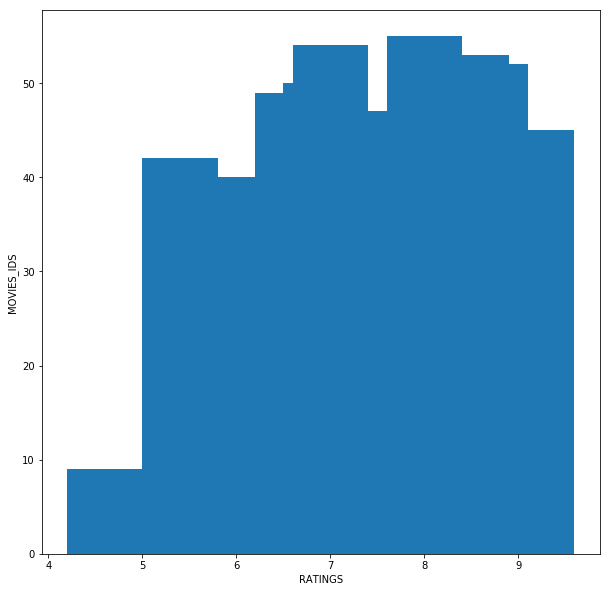

In [3]:
fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(111)

bar_width = 0.8
ax.bar(data['RATINGS'], data['MOVIES_ID'], bar_width)
ax.set_ylabel('MOVIES_IDS')
ax.set_xlabel('RATINGS')
#ax2.bar(data['release_year'],data['RATINGS'], bar_width)
plt.show()

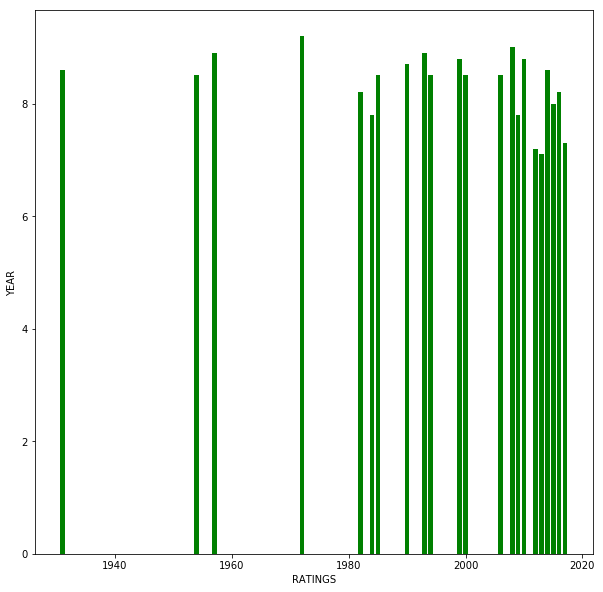

In [4]:



fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(111)

ax.set_ylabel('RATINGS')
ax.set_xlabel('YEAR')
ax.bar(data['release_year'],data['RATINGS'], bar_width, color= "green")
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 9 columns):
MOVIES NAME     55 non-null object
RATINGS         55 non-null float64
GENRE           55 non-null object
PLOT            55 non-null object
release_year    55 non-null int64
POSTER_URL      55 non-null object
DIRECTOR        55 non-null object
STARS           55 non-null object
MOVIES_ID       55 non-null int64
dtypes: float64(1), int64(2), object(6)
memory usage: 3.9+ KB


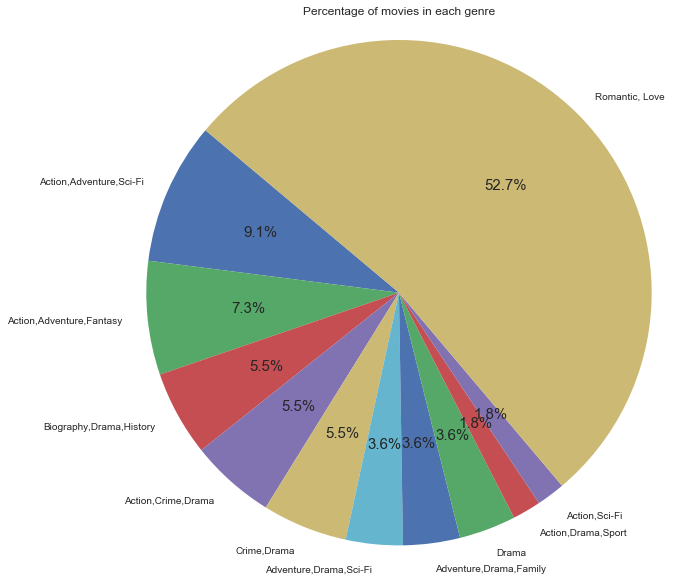

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style("whitegrid")
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['font.size'] = 15.0
mpl.rcParams['lines.linewidth'] = 20

fig = plt.figure(figsize=[10, 10])

tmdb_df = pd.read_csv("/Users/Vinit/Documents/PROJECTS_MY/IMDB_MYPROJECT/extras/dataset.csv")

tmdb_df.info()


# Obtaining a list of genres
genre_details = list(map(str,(tmdb_df['GENRE'])))
genre = []
for i in genre_details:
    split_genre = list(map(str, i.split(',')))
    for j in split_genre:
        if j not in genre:
            genre.append(j)


# minimum range value
min_year = tmdb_df['release_year'].min()
# maximum range value
max_year = tmdb_df['release_year'].max()

# Creating a dataframe with genre as index and years as columns
genre_df = pd.DataFrame(index = genre, columns = range(int(min_year), int(max_year) + 1))
# to fill not assigned values to zero
genre_df = genre_df.fillna(value = 0)
# print (genre_df.head())

# list of years of each movie
year = np.array(tmdb_df['release_year'])
# print "year is ",year
# index to access year value

z = 0
for i in genre_details:
    split_genre = list(map(str,i.split(',')))
    
    for j in split_genre:
        if(j != "nan"):
            genre_df.loc[j, year[z]] = genre_df.loc[j, year[z]] + 1
    z+=1
genre_df

# number of movies in each genre so far.
genre_count = {}
genre = []
for i in genre_details:
    split_genre = list(map(str,i.split('|')))
    for j in split_genre:
        if j in genre:
            genre_count[j] = genre_count[j] + 1
        else:
            genre.append(j)
            genre_count[j] = 1
gen_series = pd.Series(genre_count)
# pi chart
gen_series = gen_series.sort_values(ascending = False)
label = list(map(str,gen_series[0:10].keys()))
label.append('Romantic, Love')
gen = gen_series[0:10]
sum = 0
for i in gen_series[10:]:
    sum += i
gen['sum'] = sum

ax1 = fig.add_subplot(111)
ax1.pie(gen, labels = label, autopct = '%1.1f%%', startangle = 140)
ax1.axis('equal')
plt.title("Percentage of movies in each genre")
plt.show()

Input the Name of the Movie :  it
 

 


 



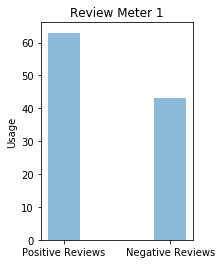

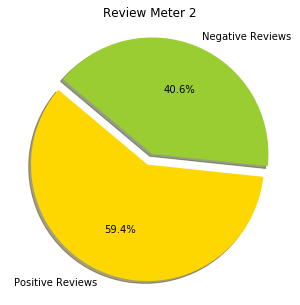



 MOVIE IS WORTH WATCHING




In [7]:
# from urllib.request import Request, urlopen
import urllib
from urllib2 import Request, urlopen, URLError
from bs4 import BeautifulSoup
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk import tokenize
from nltk import sent_tokenize
import matplotlib.pyplot as plt;
import numpy as np


#training
def word_feats(words):
#    print "Words are ",words
    return dict([(word, True) for word in words])


positive_vocab = [ 'awesome', 'outstanding', 'fantastic', 'terrific', 'good', 'nice',
                  'great', ':)','love','insightful','first-rate',
                  'charming','comical','charismatic','enjoyable','uproarious','original'
                  ,'tender', 'absorbing','sensitive', 'riveting','intriguing',
                  'powerful','fascinating', 'thought provoking'
                  ,'imaginative','legendary']

    
negative_vocab = [ 'bad', 'terrible','useless', 'hate', ':('
                   ,'second-rate','violent','moronic','third-rate','flawed','juvenile'
                   ,'boring','distasteful','ordinary','disgusting','senseless','static'
                   ,'brutal','confused','disappointing','bloody','silly','tired'
                   ,'predictable','stupid','uninteresting','weak','incredibly tiresome']
    
    
neutral_vocab = [ 'movie','the','sound','was','is','actors','did','know','words','not'
                  ,'suspenseful','low-budget','dramatic','highly-charged','sentimental',
                  'fantasy','slow','romantic','satirical','fast-moving','oddball','picaresque',
                  'big-budget','wacky','an','a','ok','fine',]



positive_features = [(word_feats(pos), 'pos') for pos in positive_vocab]
negative_features = [(word_feats(neg), 'neg') for neg in negative_vocab]
neutral_features = [(word_feats(neu), 'neu') for neu in neutral_vocab]
 
train_set = negative_features + positive_features + neutral_features

classifier = NaiveBayesClassifier.train(train_set) 

inp= raw_input("Input the Name of the Movie :  ")
for_rotten_inp=inp.replace(" ","_")
for_meta_inp=inp.replace(" ","-")
for_flex_inp=inp.replace(" ","-")
for_common_inp=inp.replace(" ","-")
sentences=[]

try:
        
    wiki1='https://www.rottentomatoes.com/m/'+for_rotten_inp+'/reviews/?type=user'

    hdr = {'User-Agent': 'Mozilla/5.0'}
    req = Request(wiki1,headers=hdr)
    ss=wiki1.split('?')
    page = urlopen(req)
    soup = BeautifulSoup(page,'html.parser')
    
    
    #print "this is soup from rottentomatoes",soup
    p_list=soup.find_all('div',{'class':'user_review'})
    for i in range(0,5):
        a=str(p_list[i].text).strip()
        paragraph=a
        lines_list = nltk.tokenize.sent_tokenize(paragraph)
        sentences.extend(lines_list)

except:
    print(" ")
    
print ("Collecting reviews from Rottentoamtoes\n")

try:
    count=0
    wiki2= "http://www.metacritic.com/movie/"+for_meta_inp+"/user-reviews"
    req = Request(wiki2,headers=hdr)
    page = urlopen(req)
    soup = BeautifulSoup(page,'html.parser') 
    p_list=soup.find_all('div',{'class':'review_body'})
    l=len(p_list)
    for i in range(0,l):
        count+=1
        a=str(p_list[i].text).strip()
        a=a.replace('Expand',' ')
        paragraph=a
        lines_list = tokenize.sent_tokenize(paragraph)
        sentences.extend(lines_list)
except:
    print(" ")

print ("Collecting reviews from metacritic\n")

try:
    count=0
    wiki3= "https://www.flixster.com/movie/"+for_flex_inp+"/"
    req = Request(wiki3,headers=hdr)
    page = urlopen(req)
    soup = BeautifulSoup(page,'html.parser')

    p_list=soup.find_all('span',{'class':'hidden as-is'})
    l=len(p_list)
    for i in range(0,l):
        count+=1
        a=str(p_list[i].text).strip()
        a=a.replace('Expand',' ')
        paragraph=a
        lines_list = tokenize.sent_tokenize(paragraph)
        sentences.extend(lines_list)
except:
    print(" ")

print ("Collecting reviews from flixster\n")

try:
    count=0
    site1= "https://www.commonsensemedia.org/movie-reviews/"+for_common_inp+"/user-reviews/child"
    req = Request(site1,headers=hdr)
    page = urlopen(req)
    soup = BeautifulSoup(page,'html.parser')

    p_list=soup.find_all('div',{'class':'views-field views-field-field-user-review-review user-review-text'})

    l=len(p_list)
    for i in range(0,l):
        count+=1
        a=str(p_list[i].text).strip()
        paragraph=a
        lines_list = tokenize.sent_tokenize(paragraph)
        sentences.extend(lines_list)
except:
    print(" ")
print ("Collecting reviews from commonsensemedia\n")

    

#CONVERTING INTO TEXT FILE :

text_file = open("Output.txt", "w")
text_file.write("Purchase Amount: %s" % sentences)
text_file.close()
with open("Output.txt", "w") as text_file:
    text_file.write("{}".format(sentences))

########################

count_pos=0
count_neg=0
final_val=0
temp = []
sid = SentimentIntensityAnalyzer()
for sentence in sentences:
    neg=02
    pos=0
    sentence = sentence.lower()
    words = sentence.split(' ')
    for word in words:
        classResult = classifier.classify(word_feats(word))
        if classResult == 'neg':
            neg = neg + 1
            
        if classResult == 'pos':
            pos = pos + 1
            
    pos_review=str(float(pos)/len(words))
    neg_review=str(float(neg)/len(words))
    
    if (float(pos_review)>float(neg_review)):
        final_val+=1
        count_pos+=1
    else:
        final_val-=1
        count_neg+=1

objects = ('Positive Reviews', 'Negative Reviews')
y_pos = np.arange(len(objects))
performance = [count_pos,count_neg]
plt.subplot(1, 2, 1)
plt.bar(y_pos, performance, align='center', alpha=0.5,width=0.3)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Review Meter 1')
plt.show()

labels = 'Positive Reviews', 'Negative Reviews'
sizes = [count_pos,count_neg]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice

fig = plt.figure(figsize=[5, 5])
ax1 = fig.add_subplot(111)


ax1.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Review Meter 2')
plt.show()


if(final_val>0):
    print("\n\n MOVIE IS WORTH WATCHING\n\n")
else:
    print("\n\n MOVIE IS NOT WORTH WATCHING\n\n")
